# **Student Performance data anlysis with dataset from kaggle**


# **Imported all the libraries needed for this project**

*   Imported pandas for reading the diffierent file formats like csv , text, and etc.


*    Imported numpy for data caculation.


*   Imported matplotlib and seaborn for data visualization.




*   Imported tain_test_split from sklearn for splitting the data into train and test sets.

*   Imported k-Neightbor classifier from sklearn as a machine learning model.


*   Imported classification report and accuracy score from sklearn for classification and accuracy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Reading different file format using pandas libraries. and create columns as names for further different uses.**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


Inbuild Fuction to display information about the dataset like gender , race/ethnicity , parental level of education , lunch , test preparation course etc.
This inbild fuction is used to display each column non null and null count and data type. Here every column has 1000 non null count

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This inbuild function describes the datasets. Here it is displaying and describing the total nuumber of non null count and mean , medium and standard deviation etc of the dataset

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


This inbuild function was used to find the shape of the 2 D matrix of the dataset in columns and rows. Here it displays 1000 rows and 8 coulumns in the dataset

In [ ]:
df.shape

(1000, 8)

This inbuild function is used display the null value present in the datasets

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Here I have created a new column which is mean score with adding math score , reading score and writinf score and dividing by 3 and rounding it

In [ ]:
df["mean score"] = ((df["math score"] + df['reading score'] + df['writing score']) / 3). round()
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group D,some college,standard,completed,59,70,78,69.0
1,male,group D,associate's degree,standard,none,96,93,87,92.0
2,female,group D,some college,free/reduced,none,57,76,77,70.0
3,male,group B,some college,free/reduced,none,70,70,63,68.0
4,female,group D,associate's degree,standard,none,83,85,86,85.0
5,male,group C,some high school,standard,none,68,57,54,60.0
6,female,group E,associate's degree,standard,none,82,83,80,82.0
7,female,group B,some high school,standard,none,46,61,58,55.0
8,male,group C,some high school,standard,none,80,75,73,76.0
9,female,group C,bachelor's degree,standard,completed,57,69,77,68.0


In [ ]:
df['gender'].value_counts()

male      508
female    492
Name: gender, dtype: int64

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

NameError: name 'df' is not defined

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,3,4,1,0,59,70,78,69.0
1,1,3,0,1,1,96,93,87,92.0
2,0,3,4,0,1,57,76,77,70.0
3,1,1,4,0,1,70,70,63,68.0
4,0,3,0,1,1,83,85,86,85.0
5,1,2,5,1,1,68,57,54,60.0
6,0,4,0,1,1,82,83,80,82.0
7,0,1,5,1,1,46,61,58,55.0
8,1,2,5,1,1,80,75,73,76.0
9,0,2,1,1,0,57,69,77,68.0


In [ ]:
df['test preparation course'].value_counts()

1    656
0    344
Name: test preparation course, dtype: int64

<Figure size 1000x2000 with 0 Axes>

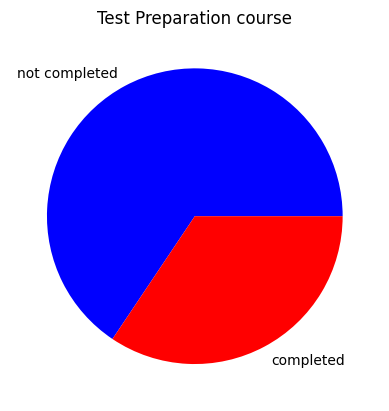

<Figure size 1000x2000 with 0 Axes>

In [ ]:
colors = ['b' , 'r']
labels = ['not completed' , 'completed']
plt.pie(df['test preparation course'].value_counts() , labels = labels , colors = colors)
plt.title('Test Preparation course')
plt.figure(figsize = (10 , 20))

In [ ]:
df['gender'].value_counts()

1    508
0    492
Name: gender, dtype: int64

Text(0.5, 1.0, 'No of males and females students')

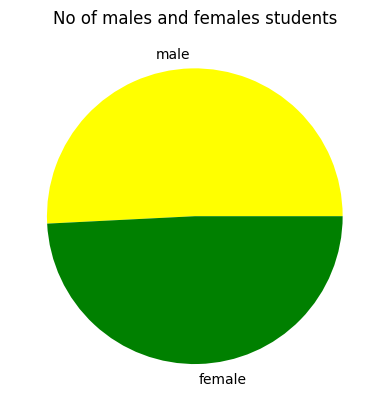

In [ ]:
labels = ['male' , 'female']
colors = ['yellow' , 'green']
plt.pie(df['gender'].value_counts() , labels = labels , colors = colors)
plt.title('No of males and females students')

In [ ]:
df['parental level of education'].value_counts()

4    224
2    215
0    204
5    177
1    105
3     75
Name: parental level of education, dtype: int64

In [ ]:
df['race/ethnicity'].value_counts()

2    323
3    257
1    198
4    143
0     79
Name: race/ethnicity, dtype: int64

Text(0.5, 1.0, 'No of students in different groups')

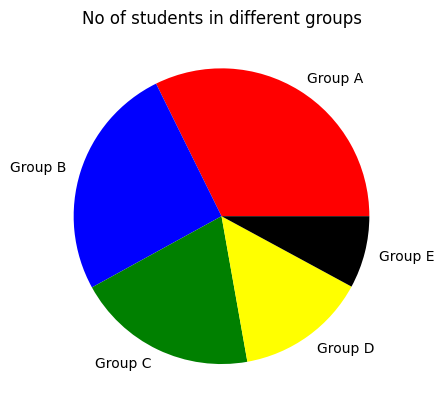

In [ ]:
labels = ['Group A' , 'Group B' , 'Group C' , 'Group D' , 'Group E']
colors = ['red' , 'blue' , 'green' , 'yellow' , 'black']
plt.pie(df['race/ethnicity'].value_counts() , labels = labels , colors = colors)
plt.title('No of students in different groups')

Text(0.5, 1.0, 'No of male and females students from different race and ethnicity')

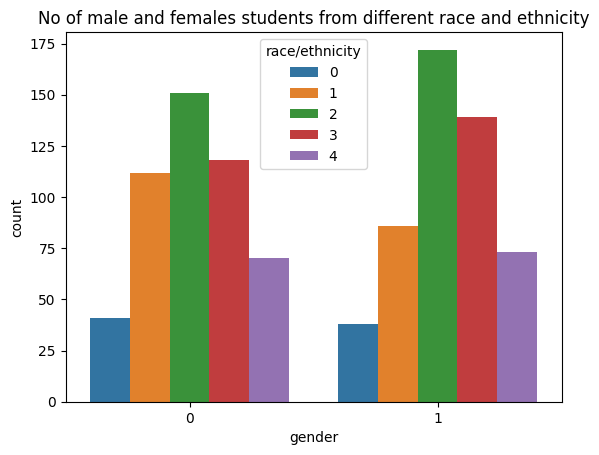

In [ ]:
plt.xlabel('race/ethnicity')
plt.ylabel('parental level of education')
sns.countplot(x = df['gender'] , hue = df['race/ethnicity'])
plt.title('No of male and females students from different race and ethnicity')

<Axes: xlabel='lunch', ylabel='mean score'>

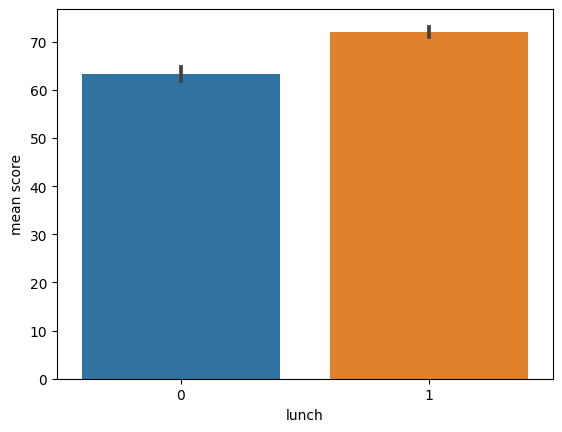

In [ ]:
sns.barplot(x = 'lunch' , y = 'mean score' , data = df)

<Axes: xlabel='gender', ylabel='mean score'>

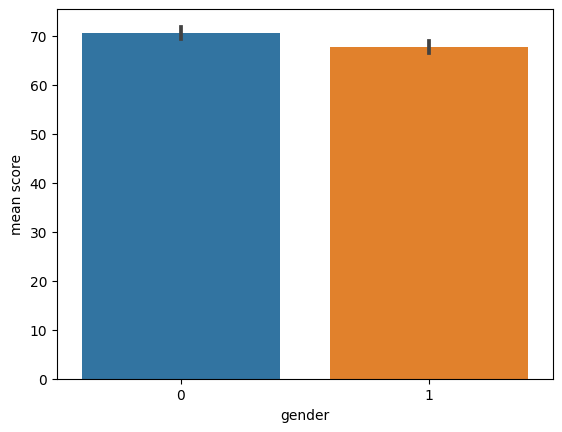

In [ ]:
sns.barplot(x = 'gender' , y = 'mean score' , data = df)

<Axes: xlabel='parental level of education', ylabel='mean score'>

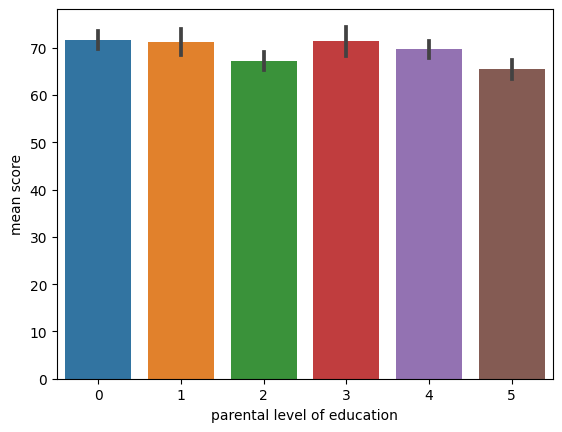

In [ ]:
sns.barplot(x = 'parental level of education' , y = 'mean score' , data = df)

In [ ]:
df.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
gender,1.000000,0.048978,0.025942,0.015708,0.032641,0.195992,-0.215775,-0.281707,-0.101068
race/ethnicity,0.048978,1.000000,0.042983,0.006608,-0.004918,0.235162,0.153572,0.166671,0.195852
parental level of education,0.025942,0.042983,1.000000,0.038919,0.011904,-0.093824,-0.100450,-0.119580,-0.110698
lunch,0.015708,0.006608,0.038919,1.000000,0.093498,0.372465,0.241319,0.234400,0.299985
test preparation course,0.032641,-0.004918,0.011904,0.093498,1.000000,-0.119925,-0.223132,-0.321520,-0.233766
math score,0.195992,0.235162,-0.093824,0.372465,-0.119925,1.000000,0.811767,0.790055,0.916486
reading score,-0.215775,0.153572,-0.100450,0.241319,-0.223132,0.811767,1.000000,0.948909,0.968017
writing score,-0.281707,0.166671,-0.119580,0.234400,-0.321520,0.790055,0.948909,1.000000,0.961216
mean score,-0.101068,0.195852,-0.110698,0.299985,-0.233766,0.916486,0.968017,0.961216,1.000000


<Axes: >

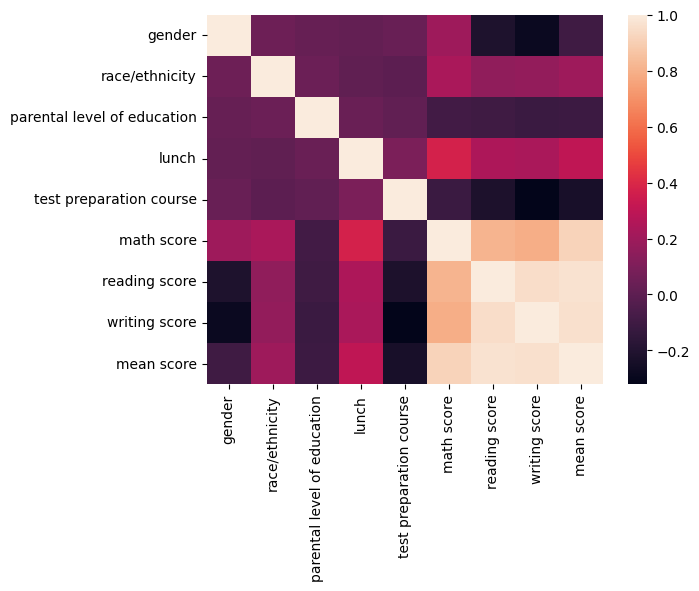

In [ ]:
sns.heatmap(df.corr())

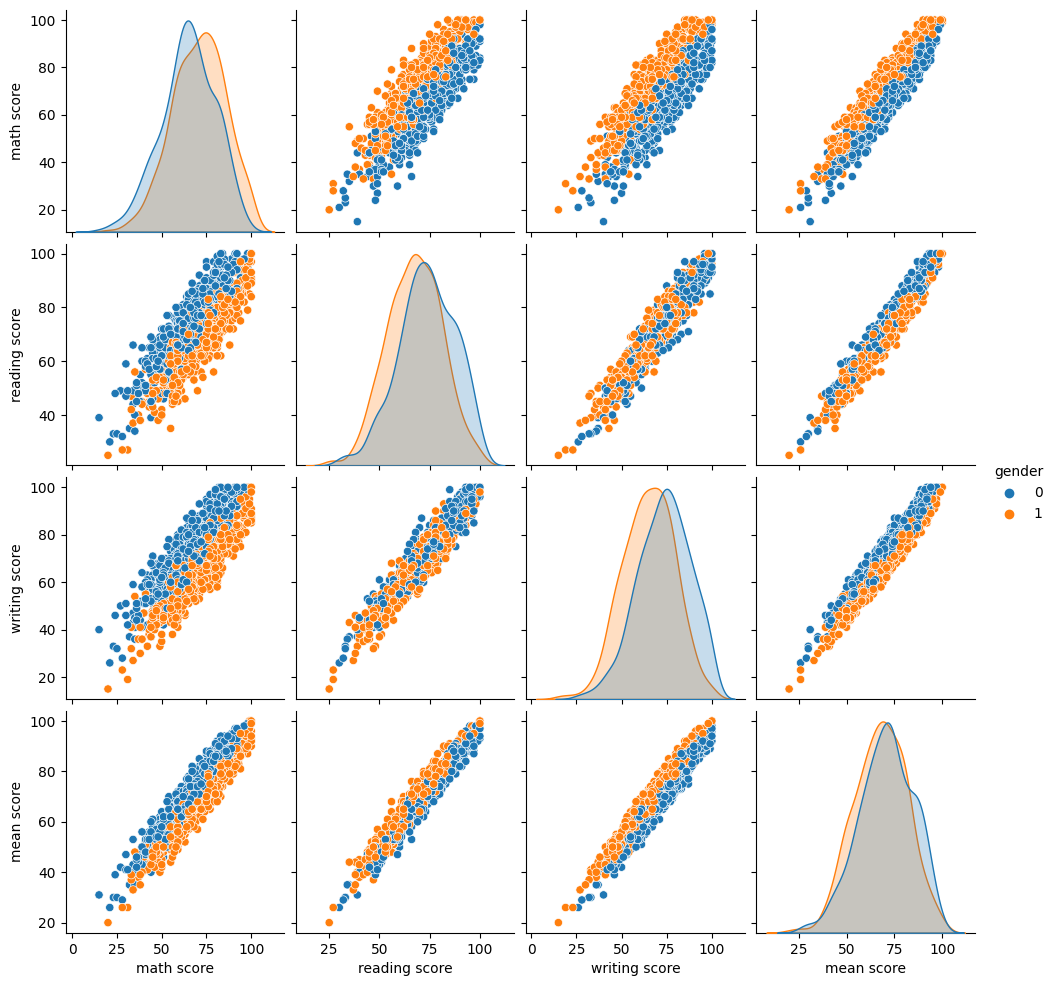

In [ ]:
sns.pairplot(df , vars = ['math score' , 'reading score' , 'writing score' , 'mean score'] , kind = 'scatter' , hue = 'gender')

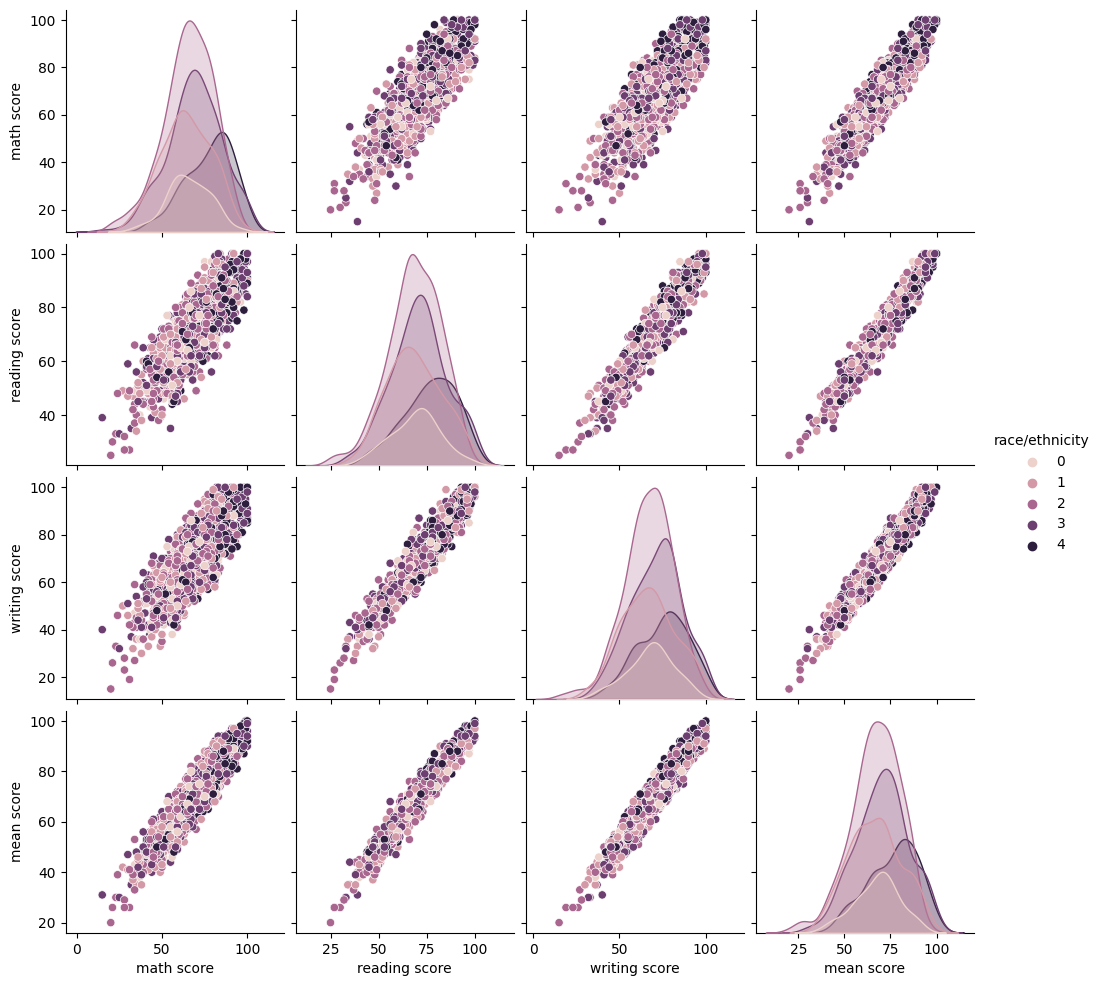

In [ ]:
sns.pairplot(df , vars = ['math score' , 'reading score' , 'writing score' , 'mean score'] , kind = 'scatter' , hue = 'race/ethnicity')

<Figure size 100x100 with 0 Axes>

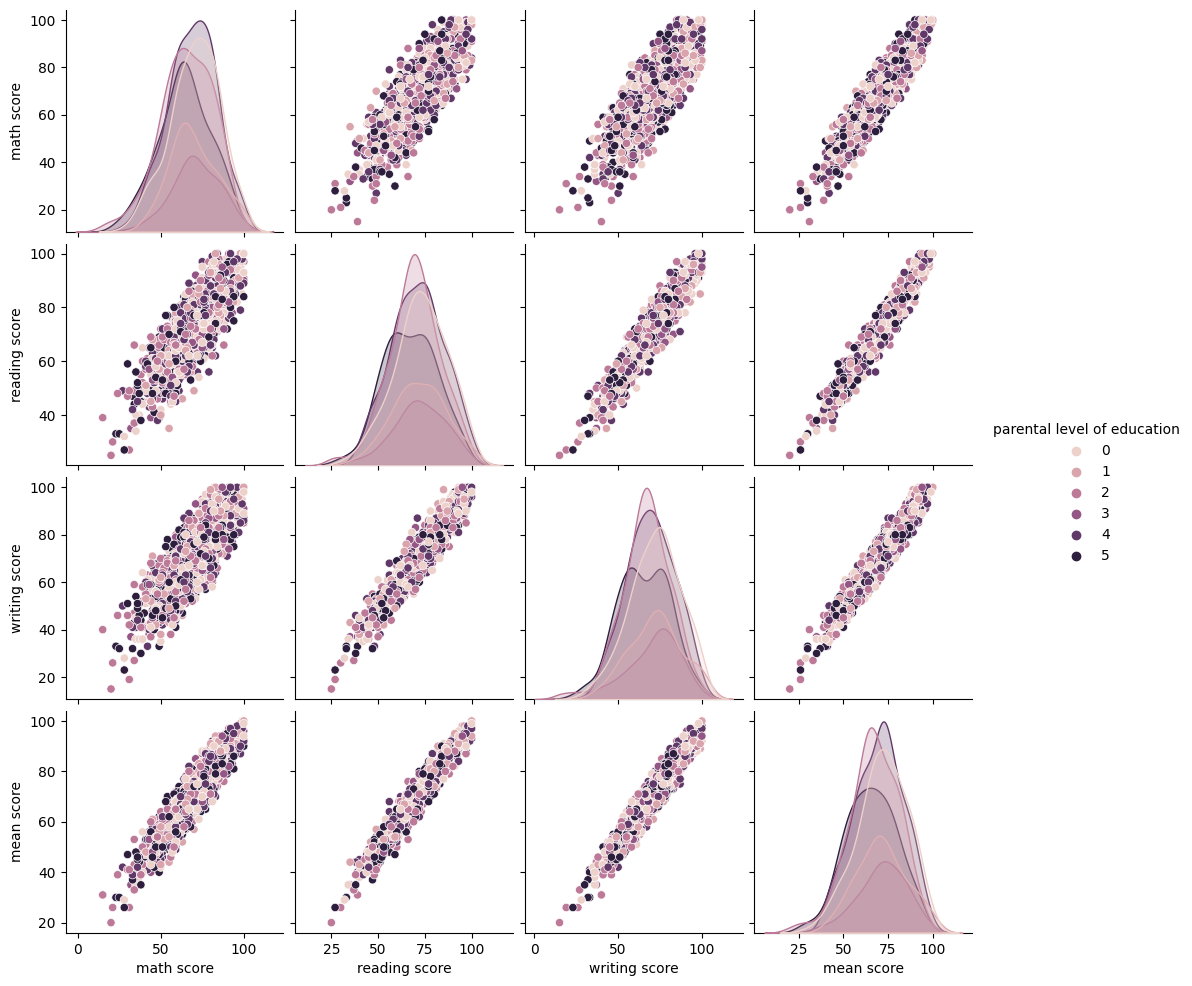

In [ ]:
plt.figure(figsize = (1 , 1))
sns.pairplot(df , vars = ['math score' , 'reading score' , 'writing score' , 'mean score'] , kind = 'scatter' , hue = 'parental level of education')

In [ ]:
df = df.drop(['math score' , 'reading score' , 'writing score'] , axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,3,4,1,0,69.0
1,1,3,0,1,1,92.0
2,0,3,4,0,1,70.0
3,1,1,4,0,1,68.0
4,0,3,0,1,1,85.0


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['mean score'] , axis = 1)
y = df['mean score']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [ ]:
x_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course
687,1,4,5,1,1
500,0,4,5,1,1
332,1,2,2,1,1
979,1,2,5,1,1
817,0,1,4,1,1
...,...,...,...,...,...
835,0,3,1,1,0
192,1,1,5,1,1
629,1,3,4,1,0
559,1,0,5,1,0


In [ ]:
y_train

687    64.0
500    93.0
332    64.0
979    82.0
817    63.0
       ... 
835    94.0
192    63.0
629    62.0
559    70.0
684    86.0
Name: mean score, Length: 800, dtype: float64

In [ ]:
print(x_train)

     gender  race/ethnicity  parental level of education  lunch  \
687       1               4                            5      1   
500       0               4                            5      1   
332       1               2                            2      1   
979       1               2                            5      1   
817       0               1                            4      1   
..      ...             ...                          ...    ...   
835       0               3                            1      1   
192       1               1                            5      1   
629       1               3                            4      1   
559       1               0                            5      1   
684       0               4                            2      1   

     test preparation course  
687                        1  
500                        1  
332                        1  
979                        1  
817                        1  
..       

In [ ]:
print(y_train)

687    64.0
500    93.0
332    64.0
979    82.0
817    63.0
       ... 
835    94.0
192    63.0
629    62.0
559    70.0
684    86.0
Name: mean score, Length: 800, dtype: float64


In [ ]:
x_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course
993,1,3,5,1,1
859,1,4,5,1,1
298,0,1,5,1,1
553,1,3,2,0,1
672,0,2,4,0,0
...,...,...,...,...,...
679,0,2,5,0,0
722,1,2,0,0,1
215,1,3,0,0,0
653,0,4,5,1,0


In [ ]:
y_test

993    79.0
859    81.0
298    49.0
553    48.0
672    70.0
       ... 
679    71.0
722    56.0
215    83.0
653    94.0
150    66.0
Name: mean score, Length: 200, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
model = LogisticRegression(solver = 'liblinear' , random_state = 0)

In [ ]:
model.fit(x_train , y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
predictions = model.predict(x_test)
predictions

array([74., 65., 56., 64., 53., 74., 74., 88., 56., 58., 82., 71., 88.,
       71., 65., 74., 64., 74., 58., 71., 88., 64., 78., 64., 74., 82.,
       71., 65., 53., 82., 64., 57., 64., 74., 78., 71., 56., 56., 64.,
       65., 58., 71., 53., 82., 58., 76., 78., 74., 65., 56., 82., 76.,
       58., 71., 74., 68., 65., 74., 92., 71., 53., 78., 71., 71., 92.,
       78., 74., 53., 78., 74., 58., 92., 53., 71., 58., 71., 92., 82.,
       65., 71., 53., 88., 88., 71., 78., 65., 78., 68., 88., 61., 56.,
       64., 65., 47., 74., 53., 76., 68., 53., 58., 88., 82., 47., 57.,
       57., 82., 71., 65., 65., 71., 71., 58., 88., 88., 71., 65., 82.,
       71., 92., 61., 78., 88., 88., 64., 78., 53., 53., 56., 74., 68.,
       71., 64., 75., 71., 56., 78., 92., 71., 82., 65., 71., 53., 65.,
       74., 71., 88., 78., 53., 71., 78., 53., 90., 58., 53., 64., 65.,
       53., 78., 78., 58., 78., 74., 64., 90., 65., 78., 78., 64., 56.,
       58., 64., 71., 71., 71., 65., 71., 78., 78., 65., 88., 74

In [ ]:
difference = abs(predictions - y_test)
difference

993     5.0
859    16.0
298     7.0
553    16.0
672    17.0
       ... 
679    18.0
722    20.0
215    19.0
653    29.0
150    12.0
Name: mean score, Length: 200, dtype: float64

In [ ]:
difference.mean()

12.33